# Load Data

In [24]:
import pandas as pd
import os

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

filename = os.path.join("Datasets", "groove", "info.csv")

data = pd.read_csv(filename, encoding="latin-1")
data.head()


Current working directory: c:\Users\kevin\Documents\MMI\Audio Data Science\StyleExtraction



,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


In [25]:
data["style"].value_counts()

style
rock                       281
hiphop                      91
funk                        77
punk                        58
neworleans/funk             48
                          ... 
middleeastern                1
latin/bomba                  1
latin/merengue               1
rock/rockabilly              1
latin/venezuelan-joropo      1
Name: count, Length: 76, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1150 non-null   object 
 1   session         1150 non-null   object 
 2   id              1150 non-null   object 
 3   style           1150 non-null   object 
 4   bpm             1150 non-null   int64  
 5   beat_type       1150 non-null   object 
 6   time_signature  1150 non-null   object 
 7   midi_filename   1150 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1150 non-null   float64
 10  split           1150 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 99.0+ KB


In [27]:
# drop all data where there is no audio file
data = data.dropna(subset=['audio_filename'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1133
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1090 non-null   object 
 1   session         1090 non-null   object 
 2   id              1090 non-null   object 
 3   style           1090 non-null   object 
 4   bpm             1090 non-null   int64  
 5   beat_type       1090 non-null   object 
 6   time_signature  1090 non-null   object 
 7   midi_filename   1090 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1090 non-null   float64
 10  split           1090 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 102.2+ KB


In [28]:
data[data["style"].str.contains("merengue")]

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
612,drummer4,drummer4/session1,drummer4/session1/9,latin/merengue,158,beat,4-4,drummer4/session1/9_latin-merengue_158_beat_4-...,drummer4/session1/9_latin-merengue_158_beat_4-...,18.304597,train
641,drummer5,drummer5/session1,drummer5/session1/8,latin/venezuelan-merengue,162,beat,5-8,drummer5/session1/8_latin-venezuelan-merengue_...,drummer5/session1/8_latin-venezuelan-merengue_...,166.912642,train
642,drummer5,drummer5/session1,drummer5/session1/9,latin/dominican-merengue,130,beat,4-4,drummer5/session1/9_latin-dominican-merengue_1...,drummer5/session1/9_latin-dominican-merengue_1...,307.425654,train


In [29]:
data[data["style"].str.contains("venezuelan")]

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
641,drummer5,drummer5/session1,drummer5/session1/8,latin/venezuelan-merengue,162,beat,5-8,drummer5/session1/8_latin-venezuelan-merengue_...,drummer5/session1/8_latin-venezuelan-merengue_...,166.912642,train
643,drummer5,drummer5/session2,drummer5/session2/1,latin/venezuelan-sangueo,101,beat,4-4,drummer5/session2/1_latin-venezuelan-sangueo_1...,drummer5/session2/1_latin-venezuelan-sangueo_1...,80.779648,train
649,drummer5,drummer5/session2,drummer5/session2/15,latin/venezuelan-joropo,80,beat,4-4,drummer5/session2/15_latin-venezuelan-joropo_8...,drummer5/session2/15_latin-venezuelan-joropo_8...,125.984375,validation


# Encode Genres

In [30]:
data2 = data.copy()

# Step 1: Split the 'style' column into separate styles
data2['style'] = data2['style'].str.replace('-', '/')
styles = data2['style'].str.get_dummies('/')

# Step 2: Concatenate the original dataframe with the new 'styles' dataframe
data_encoded = pd.concat([data2, styles], axis=1)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1133
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1090 non-null   object 
 1   session         1090 non-null   object 
 2   id              1090 non-null   object 
 3   style           1090 non-null   object 
 4   bpm             1090 non-null   int64  
 5   beat_type       1090 non-null   object 
 6   time_signature  1090 non-null   object 
 7   midi_filename   1090 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1090 non-null   float64
 10  split           1090 non-null   object 
 11  afrobeat        1090 non-null   int64  
 12  afrocuban       1090 non-null   int64  
 13  ando            1090 non-null   int64  
 14  baiao           1090 non-null   int64  
 15  bembe           1090 non-null   int64  
 16  blues           1090 non-null   int64  
 17  bomba           1090 non-null   int64 

In [31]:
data_encoded.head()

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,...,sambareggae,sangueo,secondline,shuffle,slow,soft,songo,soul,swing,venezuelan
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,...,0,0,0,0,0,0,0,0,0,0
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,...,0,0,0,0,0,0,0,1,0,0
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,...,0,0,0,0,0,0,0,0,0,0
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,...,0,0,0,0,0,0,0,1,0,0
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,...,0,0,0,0,0,0,0,1,0,0


In [32]:
data_encoded["style"].value_counts()

style
rock               258
hiphop              89
funk                69
punk                58
neworleans/funk     46
                  ... 
middleeastern        1
reggae/slow          1
rock/rockabilly      1
latin/merengue       1
latin/bomba          1
Name: count, Length: 74, dtype: int64

In [33]:
data_encoded[data_encoded.merengue == 1]["venezuelan"]

612    0
641    1
642    0
Name: venezuelan, dtype: int64

In [34]:
data_encoded[data_encoded.venezuelan == 1]

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,...,sambareggae,sangueo,secondline,shuffle,slow,soft,songo,soul,swing,venezuelan
641,drummer5,drummer5/session1,drummer5/session1/8,latin/venezuelan/merengue,162,beat,5-8,drummer5/session1/8_latin-venezuelan-merengue_...,drummer5/session1/8_latin-venezuelan-merengue_...,166.912642,...,0,0,0,0,0,0,0,0,0,1
643,drummer5,drummer5/session2,drummer5/session2/1,latin/venezuelan/sangueo,101,beat,4-4,drummer5/session2/1_latin-venezuelan-sangueo_1...,drummer5/session2/1_latin-venezuelan-sangueo_1...,80.779648,...,0,1,0,0,0,0,0,0,0,1
649,drummer5,drummer5/session2,drummer5/session2/15,latin/venezuelan/joropo,80,beat,4-4,drummer5/session2/15_latin-venezuelan-joropo_8...,drummer5/session2/15_latin-venezuelan-joropo_8...,125.984375,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data_encoded.samba[data_encoded.sambareggae == 1] = 1

C:\Users\kevin\AppData\Local\Temp\ipykernel_16344\503996563.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_encoded.samba[data_encoded.sambareggae == 1] = 1
C:\Users\kevin\AppData\Local\Temp\ipykernel_16344\503996563.py:1: SettingWi

In [36]:
data_encoded.reggae[data_encoded.sambareggae == 1] = 1

C:\Users\kevin\AppData\Local\Temp\ipykernel_16344\2063280923.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_encoded.reggae[data_encoded.sambareggae == 1] = 1
C:\Users\kevin\AppData\Local\Temp\ipykernel_16344\2063280923.py:1: Settin

In [37]:
print(data_encoded.samba[data_encoded.sambareggae == 1])
data_encoded.reggae[data_encoded.sambareggae == 1]

624    1
625    1
626    1
Name: samba, dtype: int64


624    1
625    1
626    1
Name: reggae, dtype: int64

In [38]:
data_encoded.columns

Index(['drummer', 'session', 'id', 'style', 'bpm', 'beat_type',
       'time_signature', 'midi_filename', 'audio_filename', 'duration',
       'split', 'afrobeat', 'afrocuban', 'ando', 'baiao', 'bembe', 'blues',
       'bomba', 'bossa', 'brazilian', 'breakbeat', 'calypso', 'chacarera',
       'chacha', 'country', 'dance', 'disco', 'dominican', 'fast', 'folk',
       'frevo', 'funk', 'fusion', 'gospel', 'groove1', 'groove10', 'groove2',
       'groove3', 'groove4', 'groove5', 'groove6', 'groove7', 'groove8',
       'groove9', 'halftime', 'hiphop', 'ijexa', 'indie', 'jazz', 'joropo',
       'klezmer', 'latin', 'linear', 'maracatu', 'march', 'mediumfast',
       'merengue', 'middleeastern', 'motown', 'neworleans', 'pop', 'prog',
       'punk', 'purdieshuffle', 'reggae', 'reggaeton', 'rhumba', 'rock',
       'rockabilly', 'samba', 'sambareggae', 'sangueo', 'secondline',
       'shuffle', 'slow', 'soft', 'songo', 'soul', 'swing', 'venezuelan'],
      dtype='object')

In [39]:
data_encoded.iloc[:, 11:]

,afrobeat,afrocuban,ando,baiao,bembe,blues,bomba,bossa,brazilian,breakbeat,...,sambareggae,sangueo,secondline,shuffle,slow,soft,songo,soul,swing,venezuelan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


rock          335
funk          222
jazz          101
hiphop         93
latin          90
             ... 
chacha          1
dominican       1
folk            1
frevo           1
rockabilly      1
Length: 69, dtype: int64


<Axes: >

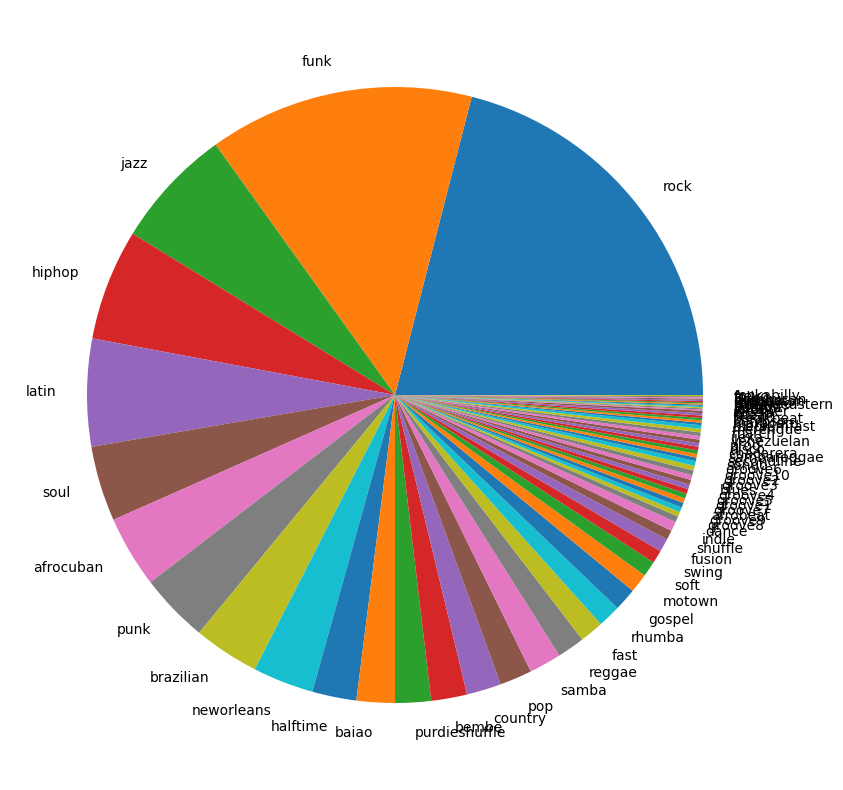

In [40]:
# Step 1: Count the values for each genre
genre_counts = data_encoded.iloc[:, 11:].sum().sort_values(ascending=False)
print(genre_counts)

# Step 2: Plot the counts in a pie chart
genre_counts.plot(kind='pie', figsize=(10, 10))

In [41]:
genre_counts.sum()

1596

In [42]:
genre_counts[genre_counts < 15].sum() / genre_counts.sum()

0.09962406015037593

In [43]:
genre_counts[["groove1", "groove2", "groove3", "groove4", "groove5", "groove6", "groove7", "groove8", "groove9", "groove10"]].sum() / genre_counts.sum()

0.02506265664160401

# Encode everyting else

In [44]:
data_encoded["beat_type"][data_encoded.beat_type == "beat"] = 1
data_encoded["beat_type"][data_encoded.beat_type == "fill"] = 0
data_encoded.beat_type = data_encoded.beat_type.astype(int)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1133
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1090 non-null   object 
 1   session         1090 non-null   object 
 2   id              1090 non-null   object 
 3   style           1090 non-null   object 
 4   bpm             1090 non-null   int64  
 5   beat_type       1090 non-null   int32  
 6   time_signature  1090 non-null   object 
 7   midi_filename   1090 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1090 non-null   float64
 10  split           1090 non-null   object 
 11  afrobeat        1090 non-null   int64  
 12  afrocuban       1090 non-null   int64  
 13  ando            1090 non-null   int64  
 14  baiao           1090 non-null   int64  
 15  bembe           1090 non-null   int64  
 16  blues           1090 non-null   int64  
 17  bomba           1090 non-null   int64 

C:\Users\kevin\AppData\Local\Temp\ipykernel_16344\1561981593.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_encoded["beat_type"][data_encoded.beat_type == "beat"] = 1
C:\Users\kevin\AppData\Local\Temp\ipykernel_16344\1561981593.py:

# Extract features

In [45]:
import librosa
import numpy as np

In [46]:
# Initialisieren der neuen Spalten mit None
new_columns = [
    "onset_env_mean", "onset_env_std", "mfcc_mean", "mfcc_std", 
    "spectral_flux_mean", "spectral_flux_std", "spectral_contrast_mean", 
    "spectral_contrast_std", "tonnetz_mean", "tonnetz_std", "rms_mean", 
    "rms_std", "spectral_centroid_mean", "spectral_centroid_std", 
    "spectral_bandwidth_mean", "spectral_bandwidth_std", 
    "spectral_flatness_mean", "spectral_flatness_std", "tempogram_mean" ,"tempogram_std"
]

for col in new_columns:
    data[col] = None

index = 0
# Iteration über den DataFrame
for file_name in data.audio_filename:
    id_mask = data.audio_filename == file_name
    print("{:.2f}% done. Processing file: {}".format((index/data.shape[0])*100, file_name))
    index += 1
    audio_path = os.path.join("Datasets\groove", file_name)
    
    if not os.path.exists(audio_path):
        print(f"File not found: {audio_path}")
        continue

    # Audio laden (als numpy-Array (y) und die samplerate (sr))
    try:
        y, sr = librosa.load(audio_path, sr=None)
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        continue
    
    # Dynamisch n_fft basierend auf der Länge des Audiosignals setzen
    n_fft = min(512, len(y) // 2)
    hop_length = n_fft // 2
    
    # Berechnung der Merkmale
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    onset_env_mean = onset_env.mean()
    onset_env_std = onset_env.std()
    
    # Berechnen des STFT und des Spectral Flux
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    spectral_flux = np.sqrt(np.mean((np.diff(stft, axis=1))**2, axis=0))
    spectral_flux_mean = spectral_flux.mean()
    spectral_flux_std = spectral_flux.std()

    # Reduziere n_mels und passe fmax an, um leere Filter zu vermeiden
    n_mels = 40
    fmax = sr / 2

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)
    mfcc_mean = mfcc.mean()
    mfcc_std = mfcc.std()

    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectral_contrast_mean = spectral_contrast.mean()
    spectral_contrast_std = spectral_contrast.std()

    tonnetz = librosa.feature.tonnetz(y=y, sr=sr, hop_length=hop_length)
    tonnetz_mean = tonnetz.mean()
    tonnetz_std = tonnetz.std()

    rms = librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length)
    rms_mean = rms.mean()
    rms_std = rms.std()

    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectral_centroid_mean = spectral_centroid.mean()
    spectral_centroid_std = spectral_centroid.std()

    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectral_bandwidth_mean = spectral_bandwidth.mean()
    spectral_bandwidth_std = spectral_bandwidth.std()

    spectral_flatness = librosa.feature.spectral_flatness(y=y, n_fft=n_fft, hop_length=hop_length)
    spectral_flatness_mean = spectral_flatness.mean()
    spectral_flatness_std = spectral_flatness.std()

    tempogram = librosa.feature.tempogram_ratio(y=y, sr=sr)
    tempogram_mean = librosa.feature.tempogram_ratio(y=y, sr=sr).mean()
    tempogram_std = librosa.feature.tempogram_ratio(y=y, sr=sr).std()

    # Schreiben der berechneten Werte in den DataFrame
    data.loc[id_mask, 'onset_env_mean'] = onset_env_mean
    data.loc[id_mask,'onset_env_std'] = onset_env_std
    data.loc[id_mask,'mfcc_mean'] = mfcc_mean
    data.loc[id_mask,'mfcc_std'] = mfcc_std
    data.loc[id_mask,'spectral_flux_mean'] = spectral_flux_mean
    data.loc[id_mask,'spectral_flux_std'] = spectral_flux_std
    data.loc[id_mask,'spectral_contrast_mean'] = spectral_contrast_mean
    data.loc[id_mask,'spectral_contrast_std'] = spectral_contrast_std
    data.loc[id_mask,'tonnetz_mean'] = tonnetz_mean
    data.loc[id_mask,'tonnetz_std'] = tonnetz_std
    data.loc[id_mask,'rms_mean'] = rms_mean
    data.loc[id_mask,'rms_std'] = rms_std
    data.loc[id_mask,'spectral_centroid_mean'] = spectral_centroid_mean
    data.loc[id_mask,'spectral_centroid_std'] = spectral_centroid_std
    data.loc[id_mask,'spectral_bandwidth_mean'] = spectral_bandwidth_mean
    data.loc[id_mask,'spectral_bandwidth_std'] = spectral_bandwidth_std
    data.loc[id_mask,'spectral_flatness_mean'] = spectral_flatness_mean
    data.loc[id_mask,'spectral_flatness_std'] = spectral_flatness_std
    data.loc[id_mask,'tempogram_mean'] = tempogram_mean
    data.loc[id_mask,'tempogram_std'] = tempogram_std

0.00% done. Processing file: drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav
0.09% done. Processing file: drummer1/eval_session/10_soul-groove10_102_beat_4-4.wav
0.18% done. Processing file: drummer1/eval_session/2_funk-groove2_105_beat_4-4.wav
0.28% done. Processing file: drummer1/eval_session/3_soul-groove3_86_beat_4-4.wav
0.37% done. Processing file: drummer1/eval_session/4_soul-groove4_80_beat_4-4.wav
0.46% done. Processing file: drummer1/eval_session/5_funk-groove5_84_beat_4-4.wav
0.55% done. Processing file: drummer1/eval_session/6_hiphop-groove6_87_beat_4-4.wav
0.64% done. Processing file: drummer1/eval_session/7_pop-groove7_138_beat_4-4.wav
0.73% done. Processing file: drummer1/eval_session/8_rock-groove8_65_beat_4-4.wav
0.83% done. Processing file: drummer1/eval_session/9_soul-groove9_105_beat_4-4.wav
0.92% done. Processing file: drummer1/session1/1_funk_80_beat_4-4.wav
1.01% done. Processing file: drummer1/session1/10_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


1.10% done. Processing file: drummer1/session1/100_neworleans-secondline_94_beat_4-4.wav
1.19% done. Processing file: drummer1/session1/101_dance-disco_120_beat_4-4.wav
1.28% done. Processing file: drummer1/session1/102_funk_95_beat_4-4.wav
1.38% done. Processing file: drummer1/session1/103_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


1.47% done. Processing file: drummer1/session1/104_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


1.56% done. Processing file: drummer1/session1/105_funk_95_fill_4-4.wav
1.65% done. Processing file: drummer1/session1/106_funk_95_fill_4-4.wav
1.74% done. Processing file: drummer1/session1/107_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


1.83% done. Processing file: drummer1/session1/108_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


1.93% done. Processing file: drummer1/session1/109_funk_95_fill_4-4.wav
2.02% done. Processing file: drummer1/session1/11_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


2.11% done. Processing file: drummer1/session1/110_funk_95_fill_4-4.wav
2.20% done. Processing file: drummer1/session1/111_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


2.29% done. Processing file: drummer1/session1/112_funk_95_fill_4-4.wav
2.39% done. Processing file: drummer1/session1/113_funk_95_fill_4-4.wav
2.48% done. Processing file: drummer1/session1/114_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


2.57% done. Processing file: drummer1/session1/115_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


2.66% done. Processing file: drummer1/session1/116_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


2.75% done. Processing file: drummer1/session1/117_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


2.84% done. Processing file: drummer1/session1/118_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


2.94% done. Processing file: drummer1/session1/119_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.03% done. Processing file: drummer1/session1/12_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


3.12% done. Processing file: drummer1/session1/120_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.21% done. Processing file: drummer1/session1/121_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.30% done. Processing file: drummer1/session1/122_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.39% done. Processing file: drummer1/session1/123_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.49% done. Processing file: drummer1/session1/124_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.58% done. Processing file: drummer1/session1/125_funk_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


3.67% done. Processing file: drummer1/session1/126_funk-fast_125_beat_4-4.wav
3.76% done. Processing file: drummer1/session1/127_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=658
  warnings.warn(


3.85% done. Processing file: drummer1/session1/128_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


3.94% done. Processing file: drummer1/session1/129_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.04% done. Processing file: drummer1/session1/13_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


4.13% done. Processing file: drummer1/session1/130_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.22% done. Processing file: drummer1/session1/131_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.31% done. Processing file: drummer1/session1/132_funk-fast_125_fill_4-4.wav
4.40% done. Processing file: drummer1/session1/133_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.50% done. Processing file: drummer1/session1/134_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=657
  warnings.warn(


4.59% done. Processing file: drummer1/session1/135_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.68% done. Processing file: drummer1/session1/136_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.77% done. Processing file: drummer1/session1/137_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


4.86% done. Processing file: drummer1/session1/138_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=579
  warnings.warn(


4.95% done. Processing file: drummer1/session1/139_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


5.05% done. Processing file: drummer1/session1/14_jazz-funk_116_fill_4-4.wav
5.14% done. Processing file: drummer1/session1/140_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


5.23% done. Processing file: drummer1/session1/141_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


5.32% done. Processing file: drummer1/session1/142_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


5.41% done. Processing file: drummer1/session1/143_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


5.50% done. Processing file: drummer1/session1/144_funk-fast_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


5.60% done. Processing file: drummer1/session1/145_latin-brazilian-baiao_95_beat_4-4.wav
5.69% done. Processing file: drummer1/session1/146_latin-brazilian-baiao_95_beat_4-4.wav
5.78% done. Processing file: drummer1/session1/147_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


5.87% done. Processing file: drummer1/session1/148_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=853
  warnings.warn(


5.96% done. Processing file: drummer1/session1/149_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.06% done. Processing file: drummer1/session1/15_jazz-funk_116_fill_4-4.wav
6.15% done. Processing file: drummer1/session1/150_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.24% done. Processing file: drummer1/session1/151_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.33% done. Processing file: drummer1/session1/152_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.42% done. Processing file: drummer1/session1/153_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.51% done. Processing file: drummer1/session1/154_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.61% done. Processing file: drummer1/session1/155_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.70% done. Processing file: drummer1/session1/156_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.79% done. Processing file: drummer1/session1/157_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.88% done. Processing file: drummer1/session1/158_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


6.97% done. Processing file: drummer1/session1/159_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


7.06% done. Processing file: drummer1/session1/16_jazz-funk_116_fill_4-4.wav
7.16% done. Processing file: drummer1/session1/160_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.25% done. Processing file: drummer1/session1/161_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.34% done. Processing file: drummer1/session1/162_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.43% done. Processing file: drummer1/session1/163_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.52% done. Processing file: drummer1/session1/164_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.61% done. Processing file: drummer1/session1/165_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.71% done. Processing file: drummer1/session1/166_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=853
  warnings.warn(


7.80% done. Processing file: drummer1/session1/167_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.89% done. Processing file: drummer1/session1/168_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


7.98% done. Processing file: drummer1/session1/169_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


8.07% done. Processing file: drummer1/session1/17_jazz-funk_116_fill_4-4.wav
8.17% done. Processing file: drummer1/session1/170_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


8.26% done. Processing file: drummer1/session1/171_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=845
  warnings.warn(


8.35% done. Processing file: drummer1/session1/172_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


8.44% done. Processing file: drummer1/session1/173_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


8.53% done. Processing file: drummer1/session1/174_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


8.62% done. Processing file: drummer1/session1/175_latin-brazilian-baiao_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


8.72% done. Processing file: drummer1/session1/176_afrocuban_105_beat_4-4.wav
8.81% done. Processing file: drummer1/session1/177_afrocuban_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=755
  warnings.warn(


8.90% done. Processing file: drummer1/session1/178_afrocuban_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


8.99% done. Processing file: drummer1/session1/179_afrocuban_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


9.08% done. Processing file: drummer1/session1/18_jazz-funk_116_fill_4-4.wav
9.17% done. Processing file: drummer1/session1/180_afrocuban_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


9.27% done. Processing file: drummer1/session1/181_afrocuban_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


9.36% done. Processing file: drummer1/session1/182_afrocuban_105_fill_4-4.wav
9.45% done. Processing file: drummer1/session1/183_afrocuban_105_beat_4-4.wav
9.54% done. Processing file: drummer1/session1/184_reggae_78_beat_4-4.wav
9.63% done. Processing file: drummer1/session1/185_reggae_78_fill_4-4.wav
9.72% done. Processing file: drummer1/session1/186_reggae_78_fill_4-4.wav
9.82% done. Processing file: drummer1/session1/187_reggae_78_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1022
  warnings.warn(


9.91% done. Processing file: drummer1/session1/188_reggae_78_fill_4-4.wav
10.00% done. Processing file: drummer1/session1/189_reggae_78_fill_4-4.wav
10.09% done. Processing file: drummer1/session1/19_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


10.18% done. Processing file: drummer1/session1/190_reggae_78_fill_4-4.wav
10.28% done. Processing file: drummer1/session1/191_reggae_78_fill_4-4.wav
10.37% done. Processing file: drummer1/session1/192_reggae_78_fill_4-4.wav
10.46% done. Processing file: drummer1/session1/193_reggae_78_fill_4-4.wav
10.55% done. Processing file: drummer1/session1/194_reggae_78_fill_4-4.wav
10.64% done. Processing file: drummer1/session1/195_reggae_78_fill_4-4.wav
10.73% done. Processing file: drummer1/session1/196_reggae_78_fill_4-4.wav
10.83% done. Processing file: drummer1/session1/197_reggae_78_fill_4-4.wav
10.92% done. Processing file: drummer1/session1/198_reggae_78_fill_4-4.wav
11.01% done. Processing file: drummer1/session1/199_reggae_78_fill_4-4.wav
11.10% done. Processing file: drummer1/session1/2_funk_80_beat_4-4.wav
11.19% done. Processing file: drummer1/session1/20_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


11.28% done. Processing file: drummer1/session1/200_reggae_78_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=994
  warnings.warn(


11.38% done. Processing file: drummer1/session1/201_reggae-slow_64_beat_4-4.wav
11.47% done. Processing file: drummer1/session1/202_rock-halftime_140_beat_4-4.wav
11.56% done. Processing file: drummer1/session1/203_rock-halftime_140_fill_4-4.wav
11.65% done. Processing file: drummer1/session1/204_rock-halftime_140_fill_4-4.wav
11.74% done. Processing file: drummer1/session1/205_rock-halftime_140_fill_4-4.wav
11.83% done. Processing file: drummer1/session1/206_rock-halftime_140_fill_4-4.wav
11.93% done. Processing file: drummer1/session1/207_rock-halftime_140_fill_4-4.wav
12.02% done. Processing file: drummer1/session1/208_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.11% done. Processing file: drummer1/session1/209_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.20% done. Processing file: drummer1/session1/21_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


12.29% done. Processing file: drummer1/session1/210_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.39% done. Processing file: drummer1/session1/211_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.48% done. Processing file: drummer1/session1/212_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.57% done. Processing file: drummer1/session1/213_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.66% done. Processing file: drummer1/session1/214_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=560
  warnings.warn(


12.75% done. Processing file: drummer1/session1/215_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.84% done. Processing file: drummer1/session1/216_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


12.94% done. Processing file: drummer1/session1/217_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.03% done. Processing file: drummer1/session1/218_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.12% done. Processing file: drummer1/session1/219_rock-halftime_140_fill_4-4.wav
13.21% done. Processing file: drummer1/session1/22_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


13.30% done. Processing file: drummer1/session1/220_rock-halftime_140_fill_4-4.wav
13.39% done. Processing file: drummer1/session1/221_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.49% done. Processing file: drummer1/session1/222_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.58% done. Processing file: drummer1/session1/223_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.67% done. Processing file: drummer1/session1/224_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.76% done. Processing file: drummer1/session1/225_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


13.85% done. Processing file: drummer1/session1/226_rock-halftime_140_fill_4-4.wav
13.94% done. Processing file: drummer1/session1/227_rock-halftime_140_fill_4-4.wav
14.04% done. Processing file: drummer1/session1/228_rock-halftime_140_fill_4-4.wav
14.13% done. Processing file: drummer1/session1/229_rock-halftime_140_fill_4-4.wav
14.22% done. Processing file: drummer1/session1/23_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


14.31% done. Processing file: drummer1/session1/230_rock-halftime_140_fill_4-4.wav
14.40% done. Processing file: drummer1/session1/231_rock-halftime_140_fill_4-4.wav
14.50% done. Processing file: drummer1/session1/232_rock-halftime_140_fill_4-4.wav
14.59% done. Processing file: drummer1/session1/233_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


14.68% done. Processing file: drummer1/session1/234_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


14.77% done. Processing file: drummer1/session1/235_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


14.86% done. Processing file: drummer1/session1/236_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


14.95% done. Processing file: drummer1/session1/237_rock-halftime_140_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


15.05% done. Processing file: drummer1/session1/238_rock-halftime_140_fill_4-4.wav
15.14% done. Processing file: drummer1/session1/239_funk-purdieshuffle_130_beat_4-4.wav
15.23% done. Processing file: drummer1/session1/24_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


15.32% done. Processing file: drummer1/session1/240_funk-purdieshuffle_130_fill_4-4.wav
15.41% done. Processing file: drummer1/session1/241_funk-purdieshuffle_130_fill_4-4.wav
15.50% done. Processing file: drummer1/session1/242_funk-purdieshuffle_130_fill_4-4.wav
15.60% done. Processing file: drummer1/session1/243_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=590
  warnings.warn(


15.69% done. Processing file: drummer1/session1/244_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


15.78% done. Processing file: drummer1/session1/245_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=609
  warnings.warn(


15.87% done. Processing file: drummer1/session1/246_funk-purdieshuffle_130_fill_4-4.wav
15.96% done. Processing file: drummer1/session1/247_funk-purdieshuffle_130_fill_4-4.wav
16.06% done. Processing file: drummer1/session1/248_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.15% done. Processing file: drummer1/session1/249_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.24% done. Processing file: drummer1/session1/25_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


16.33% done. Processing file: drummer1/session1/250_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.42% done. Processing file: drummer1/session1/251_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.51% done. Processing file: drummer1/session1/252_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.61% done. Processing file: drummer1/session1/253_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.70% done. Processing file: drummer1/session1/254_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


16.79% done. Processing file: drummer1/session1/255_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=614
  warnings.warn(


16.88% done. Processing file: drummer1/session1/256_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(


16.97% done. Processing file: drummer1/session1/257_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.06% done. Processing file: drummer1/session1/258_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.16% done. Processing file: drummer1/session1/259_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.25% done. Processing file: drummer1/session1/26_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


17.34% done. Processing file: drummer1/session1/260_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.43% done. Processing file: drummer1/session1/261_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.52% done. Processing file: drummer1/session1/262_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.61% done. Processing file: drummer1/session1/263_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.71% done. Processing file: drummer1/session1/264_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.80% done. Processing file: drummer1/session1/265_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


17.89% done. Processing file: drummer1/session1/266_funk-purdieshuffle_130_fill_4-4.wav
17.98% done. Processing file: drummer1/session1/267_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=617
  warnings.warn(


18.07% done. Processing file: drummer1/session1/268_funk-purdieshuffle_130_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=620
  warnings.warn(


18.17% done. Processing file: drummer1/session1/27_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.26% done. Processing file: drummer1/session1/28_latin-samba_116_beat_4-4.wav
18.35% done. Processing file: drummer1/session1/29_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.44% done. Processing file: drummer1/session1/3_funk_80_beat_4-4.wav
18.53% done. Processing file: drummer1/session1/30_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.62% done. Processing file: drummer1/session1/31_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.72% done. Processing file: drummer1/session1/32_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.81% done. Processing file: drummer1/session1/33_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.90% done. Processing file: drummer1/session1/34_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


18.99% done. Processing file: drummer1/session1/35_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=708
  warnings.warn(


19.08% done. Processing file: drummer1/session1/36_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=703
  warnings.warn(


19.17% done. Processing file: drummer1/session1/37_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


19.27% done. Processing file: drummer1/session1/38_latin-samba_116_beat_4-4.wav
19.36% done. Processing file: drummer1/session1/39_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


19.45% done. Processing file: drummer1/session1/4_jazz-funk_116_beat_4-4.wav
19.54% done. Processing file: drummer1/session1/40_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


19.63% done. Processing file: drummer1/session1/41_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


19.72% done. Processing file: drummer1/session1/42_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


19.82% done. Processing file: drummer1/session1/43_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


19.91% done. Processing file: drummer1/session1/44_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


20.00% done. Processing file: drummer1/session1/45_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


20.09% done. Processing file: drummer1/session1/46_latin-samba_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=712
  warnings.warn(


20.18% done. Processing file: drummer1/session1/47_jazz_102_beat_4-4.wav
20.28% done. Processing file: drummer1/session1/48_jazz_93_beat_4-4.wav
20.37% done. Processing file: drummer1/session1/49_jazz_125_beat_4-4.wav
20.46% done. Processing file: drummer1/session1/5_jazz-funk_116_beat_4-4.wav
20.55% done. Processing file: drummer1/session1/50_jazz_125_beat_4-4.wav
20.64% done. Processing file: drummer1/session1/51_rock-shuffle_125_beat_4-4.wav
20.73% done. Processing file: drummer1/session1/52_jazz_125_beat_4-4.wav
20.83% done. Processing file: drummer1/session1/53_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


20.92% done. Processing file: drummer1/session1/54_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=745
  warnings.warn(


21.01% done. Processing file: drummer1/session1/55_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.10% done. Processing file: drummer1/session1/56_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.19% done. Processing file: drummer1/session1/57_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.28% done. Processing file: drummer1/session1/58_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.38% done. Processing file: drummer1/session1/59_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.47% done. Processing file: drummer1/session1/6_jazz-funk_116_fill_4-4.wav
21.56% done. Processing file: drummer1/session1/60_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=655
  warnings.warn(


21.65% done. Processing file: drummer1/session1/61_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.74% done. Processing file: drummer1/session1/62_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.83% done. Processing file: drummer1/session1/63_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


21.93% done. Processing file: drummer1/session1/64_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.02% done. Processing file: drummer1/session1/65_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


22.11% done. Processing file: drummer1/session1/66_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.20% done. Processing file: drummer1/session1/67_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.29% done. Processing file: drummer1/session1/68_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=648
  warnings.warn(


22.39% done. Processing file: drummer1/session1/69_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.48% done. Processing file: drummer1/session1/7_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


22.57% done. Processing file: drummer1/session1/70_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.66% done. Processing file: drummer1/session1/71_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.75% done. Processing file: drummer1/session1/72_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.84% done. Processing file: drummer1/session1/73_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


22.94% done. Processing file: drummer1/session1/74_jazz_125_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


23.03% done. Processing file: drummer1/session1/75_jazz_125_beat_4-4.wav
23.12% done. Processing file: drummer1/session1/76_jazz-mediumfast_180_beat_4-4.wav
23.21% done. Processing file: drummer1/session1/77_jazz-mediumfast_180_beat_4-4.wav
23.30% done. Processing file: drummer1/session1/78_jazz-fast_290_beat_4-4.wav
23.39% done. Processing file: drummer1/session1/79_latin-reggaeton_90_beat_4-4.wav
23.49% done. Processing file: drummer1/session1/8_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


23.58% done. Processing file: drummer1/session1/80_dance-breakbeat_170_beat_4-4.wav
23.67% done. Processing file: drummer1/session1/81_dance-breakbeat_170_beat_4-4.wav
23.76% done. Processing file: drummer1/session1/82_neworleans-funk_84_beat_4-4.wav
23.85% done. Processing file: drummer1/session1/83_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=980
  warnings.warn(


23.94% done. Processing file: drummer1/session1/84_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.04% done. Processing file: drummer1/session1/85_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.13% done. Processing file: drummer1/session1/86_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.22% done. Processing file: drummer1/session1/87_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.31% done. Processing file: drummer1/session1/88_neworleans-funk_84_fill_4-4.wav
24.40% done. Processing file: drummer1/session1/89_neworleans-funk_84_fill_4-4.wav
24.50% done. Processing file: drummer1/session1/9_jazz-funk_116_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


24.59% done. Processing file: drummer1/session1/90_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.68% done. Processing file: drummer1/session1/91_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.77% done. Processing file: drummer1/session1/92_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.86% done. Processing file: drummer1/session1/93_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


24.95% done. Processing file: drummer1/session1/94_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


25.05% done. Processing file: drummer1/session1/95_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


25.14% done. Processing file: drummer1/session1/96_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


25.23% done. Processing file: drummer1/session1/97_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


25.32% done. Processing file: drummer1/session1/98_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


25.41% done. Processing file: drummer1/session1/99_neworleans-funk_84_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(


25.50% done. Processing file: drummer1/session2/1_latin-chacarera_157_beat_3-4.wav
25.60% done. Processing file: drummer1/session2/10_country_114_beat_4-4.wav
25.69% done. Processing file: drummer1/session2/100_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


25.78% done. Processing file: drummer1/session2/101_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


25.87% done. Processing file: drummer1/session2/102_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


25.96% done. Processing file: drummer1/session2/103_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.06% done. Processing file: drummer1/session2/104_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.15% done. Processing file: drummer1/session2/105_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.24% done. Processing file: drummer1/session2/106_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.33% done. Processing file: drummer1/session2/107_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.42% done. Processing file: drummer1/session2/108_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.51% done. Processing file: drummer1/session2/109_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


26.61% done. Processing file: drummer1/session2/11_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=723
  warnings.warn(


26.70% done. Processing file: drummer1/session2/110_rock-prog_190_beat_4-4.wav
26.79% done. Processing file: drummer1/session2/111_rock-prog_110_beat_5-4.wav
26.88% done. Processing file: drummer1/session2/112_afrocuban-bembe_122_beat_4-4.wav
26.97% done. Processing file: drummer1/session2/113_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=661
  warnings.warn(


27.06% done. Processing file: drummer1/session2/114_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.16% done. Processing file: drummer1/session2/115_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=657
  warnings.warn(


27.25% done. Processing file: drummer1/session2/116_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.34% done. Processing file: drummer1/session2/117_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.43% done. Processing file: drummer1/session2/118_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.52% done. Processing file: drummer1/session2/119_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.61% done. Processing file: drummer1/session2/12_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


27.71% done. Processing file: drummer1/session2/120_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.80% done. Processing file: drummer1/session2/121_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=668
  warnings.warn(


27.89% done. Processing file: drummer1/session2/122_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


27.98% done. Processing file: drummer1/session2/123_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.07% done. Processing file: drummer1/session2/124_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.17% done. Processing file: drummer1/session2/125_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.26% done. Processing file: drummer1/session2/126_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.35% done. Processing file: drummer1/session2/127_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.44% done. Processing file: drummer1/session2/128_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.53% done. Processing file: drummer1/session2/129_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.62% done. Processing file: drummer1/session2/13_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


28.72% done. Processing file: drummer1/session2/130_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.81% done. Processing file: drummer1/session2/131_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.90% done. Processing file: drummer1/session2/132_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


28.99% done. Processing file: drummer1/session2/133_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.08% done. Processing file: drummer1/session2/134_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.17% done. Processing file: drummer1/session2/135_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.27% done. Processing file: drummer1/session2/136_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.36% done. Processing file: drummer1/session2/137_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.45% done. Processing file: drummer1/session2/138_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.54% done. Processing file: drummer1/session2/139_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.63% done. Processing file: drummer1/session2/14_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


29.72% done. Processing file: drummer1/session2/140_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.82% done. Processing file: drummer1/session2/141_afrocuban-bembe_122_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


29.91% done. Processing file: drummer1/session2/142_gospel_120_beat_4-4.wav
30.00% done. Processing file: drummer1/session2/143_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.09% done. Processing file: drummer1/session2/144_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.18% done. Processing file: drummer1/session2/145_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.28% done. Processing file: drummer1/session2/146_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.37% done. Processing file: drummer1/session2/147_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.46% done. Processing file: drummer1/session2/148_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.55% done. Processing file: drummer1/session2/149_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.64% done. Processing file: drummer1/session2/15_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


30.73% done. Processing file: drummer1/session2/150_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.83% done. Processing file: drummer1/session2/151_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


30.92% done. Processing file: drummer1/session2/152_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.01% done. Processing file: drummer1/session2/153_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=674
  warnings.warn(


31.10% done. Processing file: drummer1/session2/154_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.19% done. Processing file: drummer1/session2/155_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.28% done. Processing file: drummer1/session2/156_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.38% done. Processing file: drummer1/session2/157_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.47% done. Processing file: drummer1/session2/158_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.56% done. Processing file: drummer1/session2/159_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.65% done. Processing file: drummer1/session2/16_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


31.74% done. Processing file: drummer1/session2/160_gospel_120_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


31.83% done. Processing file: drummer1/session2/161_afrocuban-rhumba_110_beat_4-4.wav
31.93% done. Processing file: drummer1/session2/162_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.02% done. Processing file: drummer1/session2/163_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.11% done. Processing file: drummer1/session2/164_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.20% done. Processing file: drummer1/session2/165_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.29% done. Processing file: drummer1/session2/166_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.39% done. Processing file: drummer1/session2/167_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.48% done. Processing file: drummer1/session2/168_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.57% done. Processing file: drummer1/session2/169_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.66% done. Processing file: drummer1/session2/17_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


32.75% done. Processing file: drummer1/session2/170_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.84% done. Processing file: drummer1/session2/171_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


32.94% done. Processing file: drummer1/session2/172_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.03% done. Processing file: drummer1/session2/173_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.12% done. Processing file: drummer1/session2/174_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.21% done. Processing file: drummer1/session2/175_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.30% done. Processing file: drummer1/session2/176_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.39% done. Processing file: drummer1/session2/177_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.49% done. Processing file: drummer1/session2/178_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.58% done. Processing file: drummer1/session2/179_afrocuban-rhumba_110_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(


33.67% done. Processing file: drummer1/session2/18_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


33.76% done. Processing file: drummer1/session2/180_rock_50_beat_4-4.wav
33.85% done. Processing file: drummer1/session2/181_rock_115_beat_4-4.wav
33.94% done. Processing file: drummer1/session2/182_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.04% done. Processing file: drummer1/session2/183_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.13% done. Processing file: drummer1/session2/184_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.22% done. Processing file: drummer1/session2/185_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.31% done. Processing file: drummer1/session2/186_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.40% done. Processing file: drummer1/session2/187_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.50% done. Processing file: drummer1/session2/188_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.59% done. Processing file: drummer1/session2/189_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.68% done. Processing file: drummer1/session2/19_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


34.77% done. Processing file: drummer1/session2/190_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.86% done. Processing file: drummer1/session2/191_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


34.95% done. Processing file: drummer1/session2/192_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.05% done. Processing file: drummer1/session2/193_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.14% done. Processing file: drummer1/session2/194_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.23% done. Processing file: drummer1/session2/195_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.32% done. Processing file: drummer1/session2/196_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.41% done. Processing file: drummer1/session2/197_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.50% done. Processing file: drummer1/session2/198_rock_115_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


35.60% done. Processing file: drummer1/session2/2_latin-chacarera_118_beat_4-4.wav
35.69% done. Processing file: drummer1/session2/20_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


35.78% done. Processing file: drummer1/session2/21_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


35.87% done. Processing file: drummer1/session2/22_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


35.96% done. Processing file: drummer1/session2/23_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.06% done. Processing file: drummer1/session2/24_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.15% done. Processing file: drummer1/session2/25_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.24% done. Processing file: drummer1/session2/26_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.33% done. Processing file: drummer1/session2/27_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.42% done. Processing file: drummer1/session2/28_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.51% done. Processing file: drummer1/session2/29_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.61% done. Processing file: drummer1/session2/3_latin-chacarera_118_beat_4-4.wav
36.70% done. Processing file: drummer1/session2/30_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.79% done. Processing file: drummer1/session2/31_country_114_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


36.88% done. Processing file: drummer1/session2/32_punk_140_beat_4-4.wav
36.97% done. Processing file: drummer1/session2/33_punk_128_beat_4-4.wav
37.06% done. Processing file: drummer1/session2/34_punk_128_beat_4-4.wav
37.16% done. Processing file: drummer1/session2/35_punk_128_beat_4-4.wav
37.25% done. Processing file: drummer1/session2/36_punk_128_beat_4-4.wav
37.34% done. Processing file: drummer1/session2/37_punk_128_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


37.43% done. Processing file: drummer1/session2/38_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


37.52% done. Processing file: drummer1/session2/39_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


37.61% done. Processing file: drummer1/session2/4_jazz_120_beat_3-4.wav
37.71% done. Processing file: drummer1/session2/40_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


37.80% done. Processing file: drummer1/session2/41_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


37.89% done. Processing file: drummer1/session2/42_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


37.98% done. Processing file: drummer1/session2/43_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.07% done. Processing file: drummer1/session2/44_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=640
  warnings.warn(


38.17% done. Processing file: drummer1/session2/45_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.26% done. Processing file: drummer1/session2/46_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.35% done. Processing file: drummer1/session2/47_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.44% done. Processing file: drummer1/session2/48_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.53% done. Processing file: drummer1/session2/49_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.62% done. Processing file: drummer1/session2/5_jazz_200_beat_3-4.wav
38.72% done. Processing file: drummer1/session2/50_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.81% done. Processing file: drummer1/session2/51_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.90% done. Processing file: drummer1/session2/52_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


38.99% done. Processing file: drummer1/session2/53_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.08% done. Processing file: drummer1/session2/54_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.17% done. Processing file: drummer1/session2/55_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.27% done. Processing file: drummer1/session2/56_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.36% done. Processing file: drummer1/session2/57_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.45% done. Processing file: drummer1/session2/58_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.54% done. Processing file: drummer1/session2/59_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.63% done. Processing file: drummer1/session2/6_rock_102_beat_3-4.wav
39.72% done. Processing file: drummer1/session2/60_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.82% done. Processing file: drummer1/session2/61_punk_128_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


39.91% done. Processing file: drummer1/session2/62_punk_144_beat_4-4.wav
40.00% done. Processing file: drummer1/session2/63_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.09% done. Processing file: drummer1/session2/64_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.18% done. Processing file: drummer1/session2/65_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.28% done. Processing file: drummer1/session2/66_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.37% done. Processing file: drummer1/session2/67_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.46% done. Processing file: drummer1/session2/68_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.55% done. Processing file: drummer1/session2/69_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.64% done. Processing file: drummer1/session2/7_jazz-march_88_beat_4-4.wav
40.73% done. Processing file: drummer1/session2/70_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.83% done. Processing file: drummer1/session2/71_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


40.92% done. Processing file: drummer1/session2/72_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.01% done. Processing file: drummer1/session2/73_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.10% done. Processing file: drummer1/session2/74_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.19% done. Processing file: drummer1/session2/75_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.28% done. Processing file: drummer1/session2/76_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.38% done. Processing file: drummer1/session2/77_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.47% done. Processing file: drummer1/session2/78_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.56% done. Processing file: drummer1/session2/79_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.65% done. Processing file: drummer1/session2/8_jazz-march_176_beat_4-4.wav
41.74% done. Processing file: drummer1/session2/80_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.83% done. Processing file: drummer1/session2/81_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


41.93% done. Processing file: drummer1/session2/82_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.02% done. Processing file: drummer1/session2/83_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.11% done. Processing file: drummer1/session2/84_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.20% done. Processing file: drummer1/session2/85_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.29% done. Processing file: drummer1/session2/86_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.39% done. Processing file: drummer1/session2/87_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.48% done. Processing file: drummer1/session2/88_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


42.57% done. Processing file: drummer1/session2/89_punk_144_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=561
  warnings.warn(


42.66% done. Processing file: drummer1/session2/9_jazz-march_120_beat_4-4.wav
42.75% done. Processing file: drummer1/session2/90_funk-rock_92_beat_4-4.wav
42.84% done. Processing file: drummer1/session2/91_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=897
  warnings.warn(


42.94% done. Processing file: drummer1/session2/92_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.03% done. Processing file: drummer1/session2/93_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.12% done. Processing file: drummer1/session2/94_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.21% done. Processing file: drummer1/session2/95_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.30% done. Processing file: drummer1/session2/96_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.39% done. Processing file: drummer1/session2/97_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.49% done. Processing file: drummer1/session2/98_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.58% done. Processing file: drummer1/session2/99_funk-rock_92_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


43.67% done. Processing file: drummer1/session3/1_rock-prog_125_beat_4-4.wav
43.76% done. Processing file: drummer1/session3/10_rock-folk_90_beat_4-4.wav
43.85% done. Processing file: drummer1/session3/11_afrobeat_94_beat_4-4.wav
43.94% done. Processing file: drummer1/session3/12_latin-bomba_96_beat_4-4.wav
44.04% done. Processing file: drummer1/session3/13_rock_115_beat_4-4.wav
44.13% done. Processing file: drummer1/session3/14_rock_94_beat_4-4.wav
44.22% done. Processing file: drummer1/session3/15_funk_117_beat_4-4.wav
44.31% done. Processing file: drummer1/session3/16_funk_117_beat_4-4.wav
44.40% done. Processing file: drummer1/session3/17_afrocuban-calypso_108_beat_4-4.wav
44.50% done. Processing file: drummer1/session3/18_rock_128_beat_4-4.wav
44.59% done. Processing file: drummer1/session3/2_jazz-swing_185_beat_4-4.wav
44.68% done. Processing file: drummer1/session3/3_rock-rockabilly_200_beat_4-4.wav
44.77% done. Processing file: drummer1/session3/4_jazz-linear_182_beat_4-4.wav
4

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


47.98% done. Processing file: drummer3/session1/27_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


48.07% done. Processing file: drummer3/session1/28_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=582
  warnings.warn(


48.17% done. Processing file: drummer3/session1/29_rock_120_beat_4-4.wav
48.26% done. Processing file: drummer3/session1/3_rock_105_beat_4-4.wav
48.35% done. Processing file: drummer3/session1/30_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


48.44% done. Processing file: drummer3/session1/31_jazz_120_beat_4-4.wav
48.53% done. Processing file: drummer3/session1/32_jazz_120_beat_4-4.wav
48.62% done. Processing file: drummer3/session1/33_jazz_120_beat_4-4.wav
48.72% done. Processing file: drummer3/session1/34_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


48.81% done. Processing file: drummer3/session1/35_rock_120_beat_4-4.wav
48.90% done. Processing file: drummer3/session1/36_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


48.99% done. Processing file: drummer3/session1/37_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


49.08% done. Processing file: drummer3/session1/38_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


49.17% done. Processing file: drummer3/session1/39_jazz_120_beat_4-4.wav
49.27% done. Processing file: drummer3/session1/4_rock_105_beat_4-4.wav
49.36% done. Processing file: drummer3/session1/40_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


49.45% done. Processing file: drummer3/session1/41_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


49.54% done. Processing file: drummer3/session1/42_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


49.63% done. Processing file: drummer3/session1/43_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


49.72% done. Processing file: drummer3/session1/44_rock_120_beat_4-4.wav
49.82% done. Processing file: drummer3/session1/45_rock_120_beat_4-4.wav
49.91% done. Processing file: drummer3/session1/46_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


50.00% done. Processing file: drummer3/session1/47_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


50.09% done. Processing file: drummer3/session1/48_rock_120_beat_4-4.wav
50.18% done. Processing file: drummer3/session1/49_rock_120_beat_4-4.wav
50.28% done. Processing file: drummer3/session1/5_rock_105_beat_4-4.wav
50.37% done. Processing file: drummer3/session1/50_rock_120_beat_4-4.wav
50.46% done. Processing file: drummer3/session1/6_rock_105_beat_4-4.wav
50.55% done. Processing file: drummer3/session1/7_rock_105_beat_4-4.wav
50.64% done. Processing file: drummer3/session1/8_jazz_105_beat_4-4.wav
50.73% done. Processing file: drummer3/session1/9_rock_105_beat_4-4.wav
50.83% done. Processing file: drummer3/session2/1_rock_100_beat_4-4.wav
50.92% done. Processing file: drummer3/session2/10_rock_100_beat_4-4.wav
51.01% done. Processing file: drummer3/session2/11_rock_100_beat_4-4.wav
51.10% done. Processing file: drummer3/session2/12_rock_100_beat_4-4.wav
51.19% done. Processing file: drummer3/session2/13_rock_100_beat_4-4.wav
51.28% done. Processing file: drummer3/session2/14_rock_1

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


51.83% done. Processing file: drummer3/session2/2_rock_100_beat_4-4.wav
51.93% done. Processing file: drummer3/session2/20_rock_92_beat_4-4.wav
52.02% done. Processing file: drummer3/session2/21_rock_92_beat_4-4.wav
52.11% done. Processing file: drummer3/session2/22_rock_92_beat_4-4.wav
52.20% done. Processing file: drummer3/session2/23_rock_92_beat_4-4.wav
52.29% done. Processing file: drummer3/session2/24_rock_92_beat_4-4.wav
52.39% done. Processing file: drummer3/session2/25_hiphop_92_beat_4-4.wav
52.48% done. Processing file: drummer3/session2/26_hiphop_92_beat_4-4.wav
52.57% done. Processing file: drummer3/session2/27_jazz_92_beat_4-4.wav
52.66% done. Processing file: drummer3/session2/28_rock_92_beat_4-4.wav
52.75% done. Processing file: drummer3/session2/29_rock_92_beat_4-4.wav
52.84% done. Processing file: drummer3/session2/3_rock_100_beat_4-4.wav
52.94% done. Processing file: drummer3/session2/30_rock_92_beat_4-4.wav
53.03% done. Processing file: drummer3/session2/31_hiphop_92

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=843
  warnings.warn(


53.85% done. Processing file: drummer3/session2/4_rock_100_beat_4-4.wav
53.94% done. Processing file: drummer3/session2/40_hiphop_110_beat_4-4.wav
54.04% done. Processing file: drummer3/session2/41_hiphop_110_beat_4-4.wav
54.13% done. Processing file: drummer3/session2/42_rock_110_beat_4-4.wav
54.22% done. Processing file: drummer3/session2/43_rock_110_beat_4-4.wav
54.31% done. Processing file: drummer3/session2/44_rock_110_fill_4-4.wav
54.40% done. Processing file: drummer3/session2/45_rock_110_fill_4-4.wav
54.50% done. Processing file: drummer3/session2/46_rock_110_fill_4-4.wav
54.59% done. Processing file: drummer3/session2/47_rock_110_beat_4-4.wav
54.68% done. Processing file: drummer3/session2/48_rock_110_beat_4-4.wav
54.77% done. Processing file: drummer3/session2/5_rock_100_beat_4-4.wav
54.86% done. Processing file: drummer3/session2/6_rock_100_beat_4-4.wav
54.95% done. Processing file: drummer3/session2/7_rock_100_beat_4-4.wav
55.05% done. Processing file: drummer3/session2/8_r

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


64.77% done. Processing file: drummer7/session1/24_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


64.86% done. Processing file: drummer7/session1/25_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


64.95% done. Processing file: drummer7/session1/26_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.05% done. Processing file: drummer7/session1/27_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.14% done. Processing file: drummer7/session1/28_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.23% done. Processing file: drummer7/session1/29_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.32% done. Processing file: drummer7/session1/3_rock_86_fill_4-4.wav
65.41% done. Processing file: drummer7/session1/30_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.50% done. Processing file: drummer7/session1/31_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.60% done. Processing file: drummer7/session1/32_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.69% done. Processing file: drummer7/session1/33_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.78% done. Processing file: drummer7/session1/34_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.87% done. Processing file: drummer7/session1/35_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


65.96% done. Processing file: drummer7/session1/36_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


66.06% done. Processing file: drummer7/session1/37_hiphop_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


66.15% done. Processing file: drummer7/session1/38_hiphop_100_beat_4-4.wav
66.24% done. Processing file: drummer7/session1/39_hiphop_100_beat_4-4.wav
66.33% done. Processing file: drummer7/session1/4_rock_86_fill_4-4.wav
66.42% done. Processing file: drummer7/session1/40_hiphop_100_beat_4-4.wav
66.51% done. Processing file: drummer7/session1/5_rock_86_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=952
  warnings.warn(


66.61% done. Processing file: drummer7/session1/6_rock_86_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=962
  warnings.warn(


66.70% done. Processing file: drummer7/session1/7_rock_93_beat_4-4.wav
66.79% done. Processing file: drummer7/session1/8_rock_93_beat_4-4.wav
66.88% done. Processing file: drummer7/session1/9_rock_93_beat_4-4.wav
66.97% done. Processing file: drummer7/session2/1_rock_120_beat_4-4.wav
67.06% done. Processing file: drummer7/session2/10_rock_95_fill_4-4.wav
67.16% done. Processing file: drummer7/session2/100_pop_142_beat_4-4.wav
67.25% done. Processing file: drummer7/session2/101_pop_142_beat_4-4.wav
67.34% done. Processing file: drummer7/session2/102_pop_132_beat_4-4.wav
67.43% done. Processing file: drummer7/session2/103_pop_132_beat_4-4.wav
67.52% done. Processing file: drummer7/session2/104_pop_132_beat_4-4.wav
67.61% done. Processing file: drummer7/session2/105_pop_132_beat_4-4.wav
67.71% done. Processing file: drummer7/session2/106_soul-motown_104_beat_4-4.wav
67.80% done. Processing file: drummer7/session2/107_soul-motown_104_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=776
  warnings.warn(


67.89% done. Processing file: drummer7/session2/108_soul-motown_104_beat_4-4.wav
67.98% done. Processing file: drummer7/session2/109_soul-motown_104_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=796
  warnings.warn(


68.07% done. Processing file: drummer7/session2/11_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


68.17% done. Processing file: drummer7/session2/110_soul-motown_104_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=796
  warnings.warn(


68.26% done. Processing file: drummer7/session2/111_soul-motown_104_fill_4-4.wav
68.35% done. Processing file: drummer7/session2/112_jazz-fusion_96_beat_4-4.wav
68.44% done. Processing file: drummer7/session2/113_jazz-fusion_96_beat_4-4.wav
68.53% done. Processing file: drummer7/session2/114_jazz-fusion_96_beat_4-4.wav
68.62% done. Processing file: drummer7/session2/115_jazz-fusion_96_beat_4-4.wav
68.72% done. Processing file: drummer7/session2/116_jazz-fusion_96_fill_4-4.wav
68.81% done. Processing file: drummer7/session2/117_jazz-fusion_96_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


68.90% done. Processing file: drummer7/session2/118_jazz-fusion_96_fill_4-4.wav
68.99% done. Processing file: drummer7/session2/119_jazz-fusion_96_fill_4-4.wav
69.08% done. Processing file: drummer7/session2/12_rock_95_beat_4-4.wav
69.17% done. Processing file: drummer7/session2/120_jazz-fusion_96_fill_4-4.wav
69.27% done. Processing file: drummer7/session2/121_jazz-fusion_96_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


69.36% done. Processing file: drummer7/session2/122_jazz-fusion_96_fill_4-4.wav
69.45% done. Processing file: drummer7/session2/123_hiphop_140_beat_4-4.wav
69.54% done. Processing file: drummer7/session2/124_hiphop_140_fill_4-4.wav
69.63% done. Processing file: drummer7/session2/125_hiphop_140_fill_4-4.wav
69.72% done. Processing file: drummer7/session2/126_hiphop_140_fill_4-4.wav
69.82% done. Processing file: drummer7/session2/127_hiphop_140_fill_4-4.wav
69.91% done. Processing file: drummer7/session2/128_hiphop_140_fill_4-4.wav
70.00% done. Processing file: drummer7/session2/129_hiphop_140_fill_4-4.wav
70.09% done. Processing file: drummer7/session2/13_rock_95_fill_4-4.wav
70.18% done. Processing file: drummer7/session2/130_hiphop_140_fill_4-4.wav
70.28% done. Processing file: drummer7/session2/131_hiphop_140_fill_4-4.wav
70.37% done. Processing file: drummer7/session2/132_hiphop_140_fill_4-4.wav
70.46% done. Processing file: drummer7/session2/133_hiphop_140_fill_4-4.wav
70.55% done.

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=701
  warnings.warn(


71.47% done. Processing file: drummer7/session2/23_rock_118_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=701
  warnings.warn(


71.56% done. Processing file: drummer7/session2/24_rock_118_beat_4-4.wav
71.65% done. Processing file: drummer7/session2/25_rock_118_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=701
  warnings.warn(


71.74% done. Processing file: drummer7/session2/26_rock_118_beat_4-4.wav
71.83% done. Processing file: drummer7/session2/27_rock_75_beat_4-4.wav
71.93% done. Processing file: drummer7/session2/28_rock_75_fill_4-4.wav
72.02% done. Processing file: drummer7/session2/29_rock_75_beat_4-4.wav
72.11% done. Processing file: drummer7/session2/3_rock_120_beat_4-4.wav
72.20% done. Processing file: drummer7/session2/30_rock_75_beat_4-4.wav
72.29% done. Processing file: drummer7/session2/31_rock_75_fill_4-4.wav
72.39% done. Processing file: drummer7/session2/32_rock_75_fill_4-4.wav
72.48% done. Processing file: drummer7/session2/33_rock_75_beat_4-4.wav
72.57% done. Processing file: drummer7/session2/34_rock_75_fill_4-4.wav
72.66% done. Processing file: drummer7/session2/35_rock_75_fill_4-4.wav
72.75% done. Processing file: drummer7/session2/36_rock_75_fill_4-4.wav
72.84% done. Processing file: drummer7/session2/37_rock_112_beat_4-4.wav
72.94% done. Processing file: drummer7/session2/38_rock_112_fi

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=712
  warnings.warn(


73.03% done. Processing file: drummer7/session2/39_rock_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=693
  warnings.warn(


73.12% done. Processing file: drummer7/session2/4_rock_120_beat_4-4.wav
73.21% done. Processing file: drummer7/session2/40_rock_112_fill_4-4.wav
73.30% done. Processing file: drummer7/session2/41_rock_112_fill_4-4.wav
73.39% done. Processing file: drummer7/session2/42_rock_112_fill_4-4.wav
73.49% done. Processing file: drummer7/session2/43_rock_112_fill_4-4.wav
73.58% done. Processing file: drummer7/session2/44_rock_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


73.67% done. Processing file: drummer7/session2/45_rock_135_beat_4-4.wav
73.76% done. Processing file: drummer7/session2/46_rock_135_beat_4-4.wav
73.85% done. Processing file: drummer7/session2/47_rock_135_fill_4-4.wav
73.94% done. Processing file: drummer7/session2/48_rock_135_fill_4-4.wav
74.04% done. Processing file: drummer7/session2/49_rock_135_beat_4-4.wav
74.13% done. Processing file: drummer7/session2/5_rock_120_beat_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


74.22% done. Processing file: drummer7/session2/50_rock_135_fill_4-4.wav
74.31% done. Processing file: drummer7/session2/51_rock_135_fill_4-4.wav
74.40% done. Processing file: drummer7/session2/52_rock_135_fill_4-4.wav
74.50% done. Processing file: drummer7/session2/53_rock_135_beat_4-4.wav
74.59% done. Processing file: drummer7/session2/54_soul-motown_148_beat_4-4.wav
74.68% done. Processing file: drummer7/session2/55_soul-motown_148_fill_4-4.wav
74.77% done. Processing file: drummer7/session2/56_soul-motown_148_fill_4-4.wav
74.86% done. Processing file: drummer7/session2/57_soul-motown_148_fill_4-4.wav
74.95% done. Processing file: drummer7/session2/58_soul-motown_148_fill_4-4.wav
75.05% done. Processing file: drummer7/session2/59_soul-motown_148_fill_4-4.wav
75.14% done. Processing file: drummer7/session2/6_rock_120_beat_4-4.wav
75.23% done. Processing file: drummer7/session2/60_soul-motown_148_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=559
  warnings.warn(


75.32% done. Processing file: drummer7/session2/61_soul-motown_148_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=559
  warnings.warn(


75.41% done. Processing file: drummer7/session2/62_soul-motown_148_fill_4-4.wav
75.50% done. Processing file: drummer7/session2/63_soul-motown_148_beat_4-4.wav
75.60% done. Processing file: drummer7/session2/64_rock_145_beat_4-4.wav
75.69% done. Processing file: drummer7/session2/65_rock_145_fill_4-4.wav
75.78% done. Processing file: drummer7/session2/66_rock_145_fill_4-4.wav
75.87% done. Processing file: drummer7/session2/67_rock_145_fill_4-4.wav
75.96% done. Processing file: drummer7/session2/68_rock_145_fill_4-4.wav
76.06% done. Processing file: drummer7/session2/69_rock_145_fill_4-4.wav
76.15% done. Processing file: drummer7/session2/7_rock_120_beat_4-4.wav
76.24% done. Processing file: drummer7/session2/70_rock_145_fill_4-4.wav
76.33% done. Processing file: drummer7/session2/71_rock_145_fill_4-4.wav
76.42% done. Processing file: drummer7/session2/72_funk_100_beat_4-4.wav
76.51% done. Processing file: drummer7/session2/73_funk_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


76.61% done. Processing file: drummer7/session2/74_funk_100_fill_4-4.wav
76.70% done. Processing file: drummer7/session2/75_funk_100_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(


76.79% done. Processing file: drummer7/session2/76_funk_100_beat_4-4.wav
76.88% done. Processing file: drummer7/session2/77_funk_100_beat_4-4.wav
76.97% done. Processing file: drummer7/session2/78_funk_100_beat_4-4.wav
77.06% done. Processing file: drummer7/session2/79_funk_100_beat_4-4.wav
77.16% done. Processing file: drummer7/session2/8_rock_95_beat_4-4.wav
77.25% done. Processing file: drummer7/session2/80_country_78_beat_4-4.wav
77.34% done. Processing file: drummer7/session2/81_country_78_fill_4-4.wav
77.43% done. Processing file: drummer7/session2/82_country_78_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1016
  warnings.warn(


77.52% done. Processing file: drummer7/session2/83_country_78_fill_4-4.wav
77.61% done. Processing file: drummer7/session2/84_country_78_fill_4-4.wav
77.71% done. Processing file: drummer7/session2/85_country_78_fill_4-4.wav
77.80% done. Processing file: drummer7/session2/86_country_78_fill_4-4.wav
77.89% done. Processing file: drummer7/session2/87_hiphop_75_beat_4-4.wav
77.98% done. Processing file: drummer7/session2/88_hiphop_75_fill_4-4.wav
78.07% done. Processing file: drummer7/session2/89_hiphop_75_fill_4-4.wav
78.17% done. Processing file: drummer7/session2/9_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


78.26% done. Processing file: drummer7/session2/90_hiphop_75_fill_4-4.wav
78.35% done. Processing file: drummer7/session2/91_hiphop_75_fill_4-4.wav
78.44% done. Processing file: drummer7/session2/92_hiphop_75_beat_4-4.wav
78.53% done. Processing file: drummer7/session2/93_hiphop_75_beat_4-4.wav
78.62% done. Processing file: drummer7/session2/94_hiphop_75_fill_4-4.wav
78.72% done. Processing file: drummer7/session2/95_hiphop_75_fill_4-4.wav
78.81% done. Processing file: drummer7/session2/96_pop_142_beat_4-4.wav
78.90% done. Processing file: drummer7/session2/97_pop_142_beat_4-4.wav
78.99% done. Processing file: drummer7/session2/98_pop_142_fill_4-4.wav
79.08% done. Processing file: drummer7/session2/99_pop_142_fill_4-4.wav
79.17% done. Processing file: drummer7/session3/1_rock_60_beat_4-4.wav
79.27% done. Processing file: drummer7/session3/10_rock_60_beat_4-4.wav
79.36% done. Processing file: drummer7/session3/100_hiphop_70_fill_4-4.wav
79.45% done. Processing file: drummer7/session3/10

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


80.46% done. Processing file: drummer7/session3/111_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


80.55% done. Processing file: drummer7/session3/112_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


80.64% done. Processing file: drummer7/session3/113_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


80.73% done. Processing file: drummer7/session3/114_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


80.83% done. Processing file: drummer7/session3/115_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


80.92% done. Processing file: drummer7/session3/116_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


81.01% done. Processing file: drummer7/session3/117_rock_95_beat_4-4.wav
81.10% done. Processing file: drummer7/session3/118_rock_95_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


81.19% done. Processing file: drummer7/session3/119_rock_95_beat_4-4.wav
81.28% done. Processing file: drummer7/session3/12_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


81.38% done. Processing file: drummer7/session3/120_rock_93_beat_4-4.wav
81.47% done. Processing file: drummer7/session3/121_rock_93_fill_4-4.wav
81.56% done. Processing file: drummer7/session3/122_rock_93_fill_4-4.wav
81.65% done. Processing file: drummer7/session3/123_rock_93_fill_4-4.wav
81.74% done. Processing file: drummer7/session3/124_rock_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


81.83% done. Processing file: drummer7/session3/125_rock_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


81.93% done. Processing file: drummer7/session3/126_rock_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


82.02% done. Processing file: drummer7/session3/127_rock_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


82.11% done. Processing file: drummer7/session3/128_rock_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


82.20% done. Processing file: drummer7/session3/129_rock_93_beat_4-4.wav
82.29% done. Processing file: drummer7/session3/13_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


82.39% done. Processing file: drummer7/session3/130_soul_105_beat_4-4.wav
82.48% done. Processing file: drummer7/session3/131_soul_105_beat_4-4.wav
82.57% done. Processing file: drummer7/session3/132_soul_105_beat_4-4.wav
82.66% done. Processing file: drummer7/session3/133_soul_105_beat_4-4.wav
82.75% done. Processing file: drummer7/session3/134_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


82.84% done. Processing file: drummer7/session3/135_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


82.94% done. Processing file: drummer7/session3/136_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.03% done. Processing file: drummer7/session3/137_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.12% done. Processing file: drummer7/session3/138_soul_105_fill_4-4.wav
83.21% done. Processing file: drummer7/session3/139_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.30% done. Processing file: drummer7/session3/14_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


83.39% done. Processing file: drummer7/session3/140_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.49% done. Processing file: drummer7/session3/141_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.58% done. Processing file: drummer7/session3/142_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.67% done. Processing file: drummer7/session3/143_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.76% done. Processing file: drummer7/session3/144_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.85% done. Processing file: drummer7/session3/145_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


83.94% done. Processing file: drummer7/session3/146_soul_105_fill_4-4.wav
84.04% done. Processing file: drummer7/session3/147_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


84.13% done. Processing file: drummer7/session3/148_soul_105_fill_4-4.wav
84.22% done. Processing file: drummer7/session3/149_soul_105_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


84.31% done. Processing file: drummer7/session3/15_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


84.40% done. Processing file: drummer7/session3/150_soul_105_beat_4-4.wav
84.50% done. Processing file: drummer7/session3/151_soul_98_beat_4-4.wav
84.59% done. Processing file: drummer7/session3/152_soul_98_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


84.68% done. Processing file: drummer7/session3/153_soul_98_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


84.77% done. Processing file: drummer7/session3/154_soul_98_fill_4-4.wav
84.86% done. Processing file: drummer7/session3/155_soul_98_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


84.95% done. Processing file: drummer7/session3/156_soul_98_fill_4-4.wav
85.05% done. Processing file: drummer7/session3/157_soul_98_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


85.14% done. Processing file: drummer7/session3/158_soul_98_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


85.23% done. Processing file: drummer7/session3/159_soul_98_beat_4-4.wav
85.32% done. Processing file: drummer7/session3/16_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


85.41% done. Processing file: drummer7/session3/17_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


85.50% done. Processing file: drummer7/session3/18_pop-soft_83_fill_4-4.wav
85.60% done. Processing file: drummer7/session3/19_pop-soft_83_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(


85.69% done. Processing file: drummer7/session3/2_rock_60_fill_4-4.wav
85.78% done. Processing file: drummer7/session3/20_pop-soft_83_fill_4-4.wav
85.87% done. Processing file: drummer7/session3/21_pop-soft_83_fill_4-4.wav
85.96% done. Processing file: drummer7/session3/22_pop-soft_83_beat_4-4.wav
86.06% done. Processing file: drummer7/session3/23_pop-soft_83_beat_4-4.wav
86.15% done. Processing file: drummer7/session3/24_hiphop_67_beat_4-4.wav
86.24% done. Processing file: drummer7/session3/25_hiphop_67_fill_4-4.wav
86.33% done. Processing file: drummer7/session3/26_hiphop_67_fill_4-4.wav
86.42% done. Processing file: drummer7/session3/27_hiphop_67_fill_4-4.wav
86.51% done. Processing file: drummer7/session3/28_hiphop_67_fill_4-4.wav
86.61% done. Processing file: drummer7/session3/29_hiphop_67_fill_4-4.wav
86.70% done. Processing file: drummer7/session3/3_rock_60_fill_4-4.wav
86.79% done. Processing file: drummer7/session3/30_hiphop_67_fill_4-4.wav
86.88% done. Processing file: drumme

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


88.90% done. Processing file: drummer7/session3/51_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


88.99% done. Processing file: drummer7/session3/52_funk_112_fill_4-4.wav
89.08% done. Processing file: drummer7/session3/53_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


89.17% done. Processing file: drummer7/session3/54_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


89.27% done. Processing file: drummer7/session3/55_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


89.36% done. Processing file: drummer7/session3/56_funk_112_fill_4-4.wav
89.45% done. Processing file: drummer7/session3/57_funk_112_fill_4-4.wav
89.54% done. Processing file: drummer7/session3/58_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


89.63% done. Processing file: drummer7/session3/59_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


89.72% done. Processing file: drummer7/session3/6_rock_60_fill_4-4.wav
89.82% done. Processing file: drummer7/session3/60_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


89.91% done. Processing file: drummer7/session3/61_funk_112_fill_4-4.wav
90.00% done. Processing file: drummer7/session3/62_funk_112_fill_4-4.wav
90.09% done. Processing file: drummer7/session3/63_funk_112_fill_4-4.wav
90.18% done. Processing file: drummer7/session3/64_funk_112_beat_4-4.wav
90.28% done. Processing file: drummer7/session3/65_funk_112_beat_4-4.wav
90.37% done. Processing file: drummer7/session3/66_funk_112_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(


90.46% done. Processing file: drummer7/session3/67_neworleans-funk_93_beat_4-4.wav
90.55% done. Processing file: drummer7/session3/68_neworleans-funk_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


90.64% done. Processing file: drummer7/session3/69_neworleans-funk_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


90.73% done. Processing file: drummer7/session3/7_rock_60_fill_4-4.wav
90.83% done. Processing file: drummer7/session3/70_neworleans-funk_93_fill_4-4.wav
90.92% done. Processing file: drummer7/session3/71_neworleans-funk_93_fill_4-4.wav
91.01% done. Processing file: drummer7/session3/72_neworleans-funk_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


91.10% done. Processing file: drummer7/session3/73_neworleans-funk_93_fill_4-4.wav
91.19% done. Processing file: drummer7/session3/74_neworleans-funk_93_fill_4-4.wav
91.28% done. Processing file: drummer7/session3/75_neworleans-funk_93_fill_4-4.wav
91.38% done. Processing file: drummer7/session3/76_neworleans-funk_93_fill_4-4.wav
91.47% done. Processing file: drummer7/session3/77_neworleans-funk_93_fill_4-4.wav
91.56% done. Processing file: drummer7/session3/78_neworleans-funk_93_fill_4-4.wav
91.65% done. Processing file: drummer7/session3/79_neworleans-funk_93_fill_4-4.wav
91.74% done. Processing file: drummer7/session3/8_rock_60_fill_4-4.wav
91.83% done. Processing file: drummer7/session3/80_neworleans-funk_93_fill_4-4.wav
91.93% done. Processing file: drummer7/session3/81_neworleans-funk_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


92.02% done. Processing file: drummer7/session3/82_neworleans-funk_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


92.11% done. Processing file: drummer7/session3/83_neworleans-funk_93_fill_4-4.wav


c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


92.20% done. Processing file: drummer7/session3/84_neworleans-funk_93_fill_4-4.wav
92.29% done. Processing file: drummer7/session3/85_neworleans-funk_93_fill_4-4.wav
92.39% done. Processing file: drummer7/session3/86_neworleans-funk_93_fill_4-4.wav
92.48% done. Processing file: drummer7/session3/87_neworleans-funk_93_fill_4-4.wav
92.57% done. Processing file: drummer7/session3/88_neworleans-funk_93_fill_4-4.wav
92.66% done. Processing file: drummer7/session3/89_neworleans-funk_93_fill_4-4.wav
92.75% done. Processing file: drummer7/session3/9_rock_60_fill_4-4.wav
92.84% done. Processing file: drummer7/session3/90_neworleans-funk_93_fill_4-4.wav
92.94% done. Processing file: drummer7/session3/91_neworleans-funk_93_beat_4-4.wav
93.03% done. Processing file: drummer7/session3/92_hiphop_70_beat_4-4.wav
93.12% done. Processing file: drummer7/session3/93_hiphop_70_fill_4-4.wav
93.21% done. Processing file: drummer7/session3/94_hiphop_70_fill_4-4.wav
93.30% done. Processing file: drummer7/sess

In [47]:
data.to_csv("data_processed")

# Split labels and features

In [48]:
# seperate labels
y = data_encoded.iloc[:, 11:]
# seperate data
X = data_encoded.iloc[:, :11]
# drop unnecessary data
X = X.drop(columns=["drummer", "session", "id", "midi_filename", "audio_filename", "style"])
# should we use their split instead of our own?
X = X.drop(columns=["split"])
# time signature would be a nice feature, but they are 99% in 4/4. We might as well drop this column to pevent overfitting
X = X.drop(columns=["time_signature"])

In [49]:
# only labels
y.head()

,afrobeat,afrocuban,ando,baiao,bembe,blues,bomba,bossa,brazilian,breakbeat,...,sambareggae,sangueo,secondline,shuffle,slow,soft,songo,soul,swing,venezuelan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# only features
X.head()

,bpm,beat_type,duration
0,138,1,27.872308
1,102,1,37.691158
2,105,1,36.351218
3,86,1,44.716543
4,80,1,47.987500


In [51]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

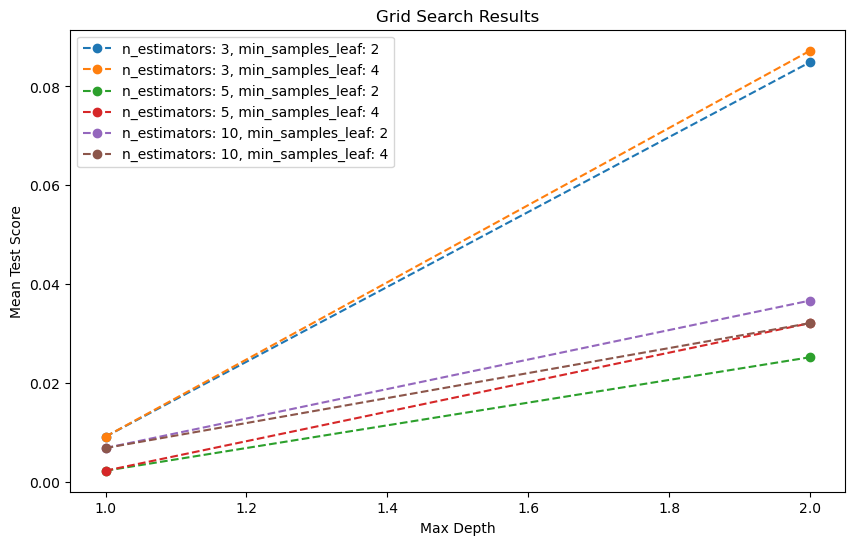

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

def perform_and_plot_RNDForest_grid_search(prefixed_parameters: dict, train_data, train_labels):    
    # Initialize the base classifier
    rf = RandomForestClassifier(random_state=42)
    # Wrap with MultiOutputClassifier
    multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)
    
    # Perform grid search
    grid_search = GridSearchCV(multi_target_rf, prefixed_parameters, verbose=0, scoring='accuracy', cv=5)
    grid_search.fit(train_data, train_labels)
    
    # Collect grid search results
    cv_results = grid_search.cv_results_
    mean_test_scores = cv_results['mean_test_score']
    params = cv_results['params']

    # Prepare data for plotting
    scores_array = np.array(mean_test_scores).reshape(
        len(prefixed_parameters['estimator__max_depth']),
        len(prefixed_parameters['estimator__min_samples_leaf']),
        len(prefixed_parameters['estimator__n_estimators'])
    )

    # Create a line plot for each n_estimators
    fig, ax = plt.subplots(figsize=(10, 6))

    for k, n_estimators in enumerate(prefixed_parameters['estimator__n_estimators']):
        scores_for_n_estimators = scores_array[:, :, k].T
        for i, min_samples_leaf in enumerate(prefixed_parameters['estimator__min_samples_leaf']):
            ax.plot(prefixed_parameters['estimator__max_depth'], scores_for_n_estimators[i],
                    marker='o', linestyle='--', label=f'n_estimators: {n_estimators}, min_samples_leaf: {min_samples_leaf}')

    ax.set_title('Grid Search Results')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Mean Test Score')
    ax.legend(loc='best')

    plt.show()
    
    return grid_search

# Example usage
parameters = {
    'estimator__max_depth': [1, 2],
    'estimator__min_samples_leaf': [2, 4],
    'estimator__n_estimators': [3, 5, 10]
}

# Assume X_train and y_train are your training data and labels
grid_search_result = perform_and_plot_RNDForest_grid_search(parameters, X_train, y_train)


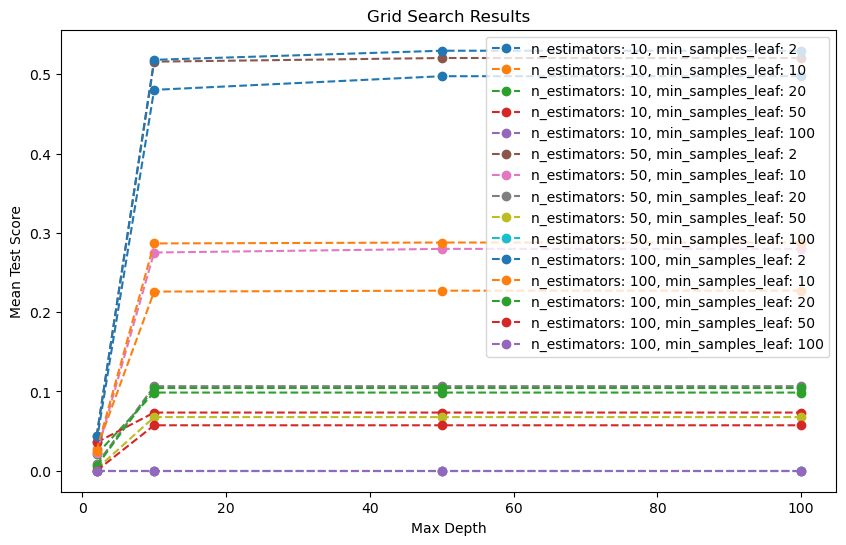

{'estimator__max_depth': 50, 'estimator__min_samples_leaf': 2, 'estimator__n_estimators': 100}


In [53]:
prefixed_parameters = {"estimator__max_depth": [2, 10, 50, 100],
              "estimator__min_samples_leaf": [2, 10, 20, 50, 100],
              "estimator__n_estimators":[10, 50, 100]}

grid_search = perform_and_plot_RNDForest_grid_search(prefixed_parameters, X_train, y_train)
print(grid_search.best_params_)

In [54]:
from sklearn.metrics import classification_report, hamming_loss

# Initialize the base classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap the classifier with MultiOutputClassifier
multi_target_random_forest = MultiOutputClassifier(random_forest, n_jobs=-1)

# Train the model
multi_target_random_forest.fit(X_train, y_train)

# Make predictions
y_pred = multi_target_random_forest.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f'{i}' for i in y.columns]))

print("Hamming Loss:", hamming_loss(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     afrobeat       0.00      0.00      0.00         0
    afrocuban       1.00      0.81      0.90        16
         ando       0.00      0.00      0.00         0
        baiao       0.40      0.29      0.33         7
        bembe       1.00      1.00      1.00         8
        blues       0.00      0.00      0.00         1
        bomba       0.00      0.00      0.00         1
        bossa       0.00      0.00      0.00         0
    brazilian       0.33      0.22      0.27         9
    breakbeat       0.00      0.00      0.00         0
      calypso       0.00      0.00      0.00         0
    chacarera       0.00      0.00      0.00         1
       chacha       0.00      0.00      0.00         0
      country       0.67      1.00      0.80         4
        dance       0.00      0.00      0.00         1
        disco       0.00      0.00      0.00         1
    dominican       0.00      0.00      0

c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevin\miniconda3\envs\audio_data_science\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

# Convolutional Neural Network

In [56]:
# Import data generator from keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'requests'